#**OUTLIER**

An outlier is a data point that is significantly different from the other observations in a dataset. It may occur due to variability in the data, measurement errors, or rare events. Outliers can affect statistical analyses, skew results, and mislead machine learning models. Identifying and handling outliers is crucial to ensure accurate analysis.

###**EXAMPLE**

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset
data = {'Value': [10, 12, 11, 13, 15, 14, 16, 40, 14, 12, 11, 13]} #here, 40 is an outlier
df = pd.DataFrame(data)
df

,Value
0,10
1,12
2,11
3,13
4,15
5,14
6,16
7,40
8,14
9,12


<Axes: >

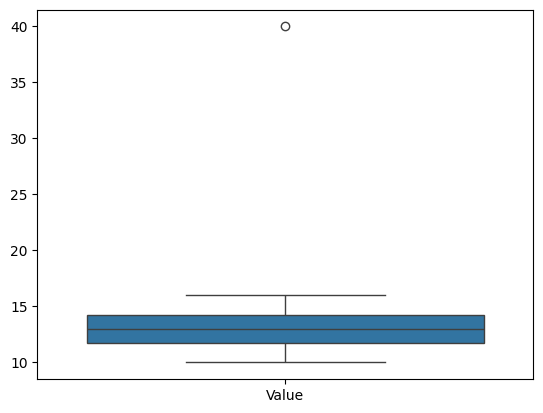

In [39]:
sns.boxplot(df) # boxplot for detecting an outlier using seaborn

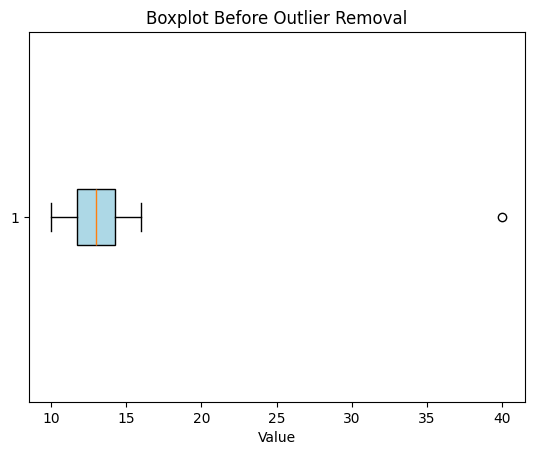

In [40]:
# Boxplot visualization
plt.boxplot(df['Value'], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue")) #using matplotlib
plt.title("Boxplot Before Outlier Removal")
plt.xlabel("Value")
plt.show()




###**Identifying and Removing Outliers**

We can use the Interquartile Range (IQR) method to detect and remove outliers. Steps:

Calculate the first quartile (Q1) and third quartile (Q3).
Compute the IQR as


IQR=Q3−Q1.

Define the lower and upper bounds:

Lower bound:

Q1−1.5×IQR

Upper bound:


Q3+1.5×IQR

Filter the data to exclude outliers.

In [41]:
# Calculate Q1, Q3, and IQR
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = df[(df['Value'] >= lower_bound) & (df['Value'] <= upper_bound)]


In [42]:
df_cleaned

,Value
0,10
1,12
2,11
3,13
4,15
5,14
6,16
8,14
9,12
10,11


<Axes: >

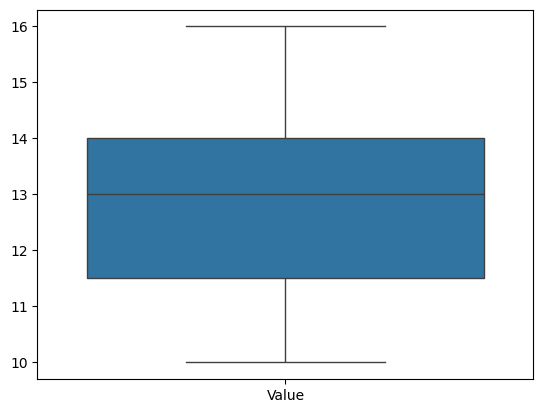

In [44]:
sns.boxplot(df_cleaned)

###**Effects of Outlier Removal**
Data Distribution:
Outlier removal ensures the data distribution is more representative of the general trend.
The mean and standard deviation become more reliable.

Visualization:
Boxplots and histograms appear less skewed.

Model Performance:
Outlier removal reduces noise and prevents models from being biased by extreme values.

Descriptive Statistics:
Metrics like mean, variance, and range become more meaningful and accurate.

###**Z-Score Method**

The Z-Score measures how many standard deviations a data point is from the mean. It is calculated as:


Z=
(X−μ)/σ
​

Where:

X is the data point.
μ is the mean of the dataset.

σ is the standard deviation of the dataset.

Outliers are typically defined as data points with
∣Z∣>3 (i.e., more than 3 standard deviations away from the mean).



In [45]:
import numpy as np
import pandas as pd

# Generate a sample dataset with an outlier
data = {'Feature1': np.random.normal(50, 10, 1000).tolist() + [300],  # Add an outlier
        'Feature2': np.random.normal(30, 5, 1000).tolist() + [100]}  # Add an outlier
df = pd.DataFrame(data)

# Define a function to remove outliers using Z-Score
def remove_outliers_zscore(df, threshold=3):
    z_scores = np.abs((df - df.mean()) / df.std())
    return df[(z_scores < threshold).all(axis=1)]

# Apply the function
df_cleaned = remove_outliers_zscore(df)

# Print before and after
print("Original dataset shape:", df.shape)
print("Cleaned dataset shape:", df_cleaned.shape)


Original dataset shape: (1001, 2)
Cleaned dataset shape: (1000, 2)
